<a href="https://colab.research.google.com/github/ishancoderr/Neural-networks/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing dataset
url='https://raw.githubusercontent.com/ishancoderr/Neural-networks/main/Credit_Card_Applications.csv'
dataset=pd.read_csv(url)

In [4]:
X =dataset.iloc[:, :-1].values
y =dataset.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

 **Training the SOM**

In [7]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=7277c91a4aa80a30b33bd9647c45a2858d850b29e99d2fd738fb4580ebd59990
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


In [8]:
from minisom import MiniSom

In [9]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [10]:
som.random_weights_init(X)
som.train_random(data =X,num_iteration=100)

# Visualizing the results

In [28]:
from pylab import bone, pcolor, colorbar, plot, show

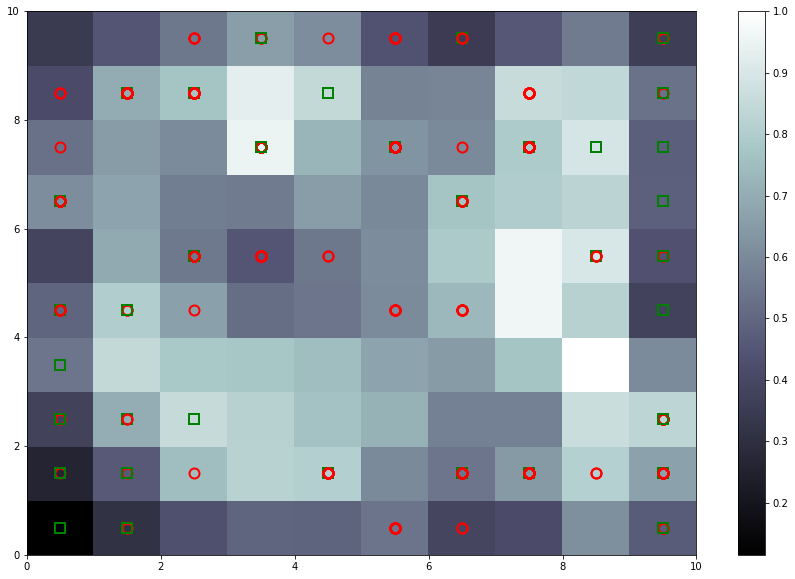

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()



**Finding the fraunds**

In [36]:
mappings = som.win_map(X)


In [37]:
#frauds = np.concatenate((mappings[(8, 1)], mappings[(6, 8)]), axis=0)
#pd.DataFrame(frauds)